<a href="https://colab.research.google.com/github/syedanida/Advanced-Dimensionality-Reduction/blob/main/Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
!pip install umap-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Set plot style
sns.set(style="whitegrid")

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

100%|██████████| 62.6M/62.6M [00:03<00:00, 16.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [7]:
import zipfile
import os

# Extract files if the dataset is zipped
if path.endswith(".zip"):
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall("./sign_language_mnist")
    dataset_path = "./sign_language_mnist"
else:
    dataset_path = path

print("Dataset extracted to:", dataset_path)


Dataset extracted to: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1


In [8]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv(os.path.join(dataset_path, "sign_mnist_train.csv"))

# Display the structure of the dataset
print(train_data.head())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [9]:
# Preprocess the data

from sklearn.preprocessing import StandardScaler

# Split into features (X) and labels (y)
X = train_data.iloc[:, 1:].values  # Pixel data
y = train_data.iloc[:, 0].values   # Labels

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally reduce the dataset size for faster processing
from sklearn.model_selection import train_test_split
X_small, _, y_small, _ = train_test_split(X_scaled, y, test_size=0.9, stratify=y, random_state=42)

print(f"Shape of reduced dataset: {X_small.shape}")


Shape of reduced dataset: (2745, 784)


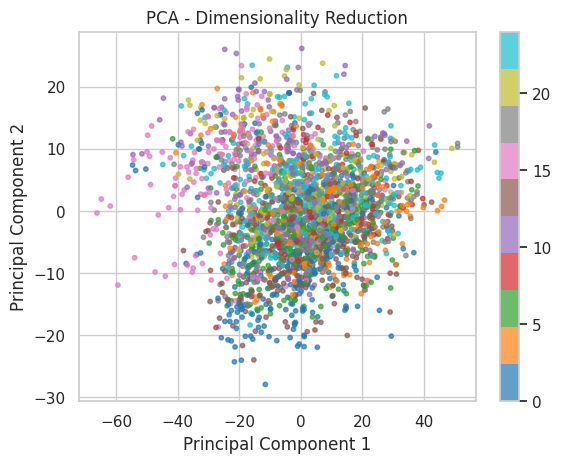

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_small)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_small, cmap='tab10', alpha=0.7, s=10)
plt.colorbar()
plt.title("PCA - Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# t-SNE with Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


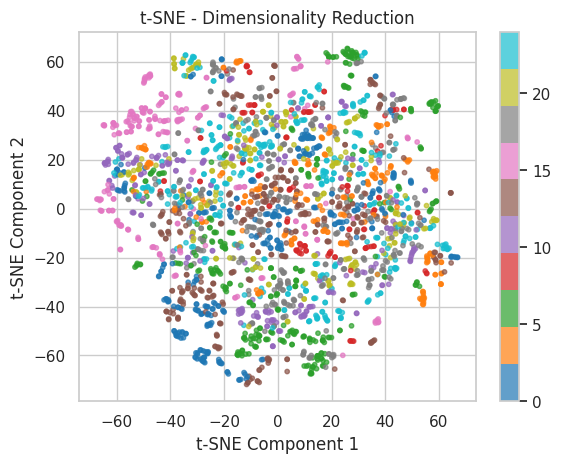

In [11]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_small)

# Visualize the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_small, cmap='tab10', alpha=0.7, s=10)
plt.colorbar()
plt.title("t-SNE - Dimensionality Reduction")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


# UMAP with Interactive Visualization

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


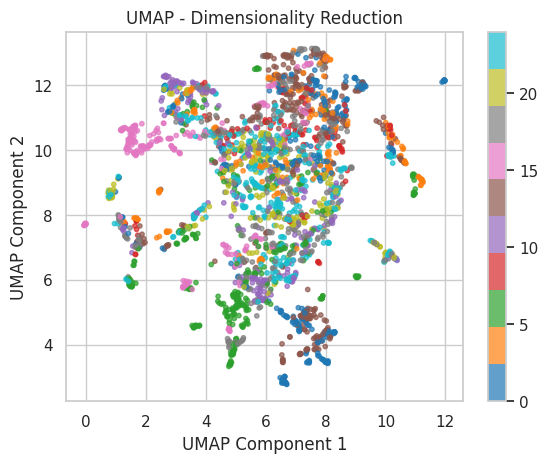

In [12]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_small)

# Visualize the results
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_small, cmap='tab10', alpha=0.7, s=10)
plt.colorbar()
plt.title("UMAP - Dimensionality Reduction")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


# LLE (Locally Linear Embedding)

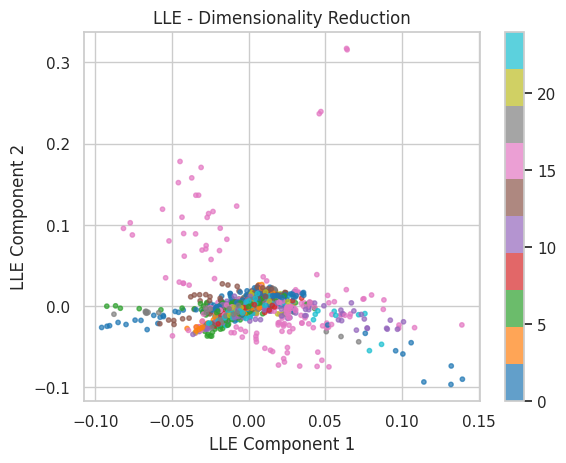

In [13]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
X_lle = lle.fit_transform(X_small)

# Visualize the results
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_small, cmap='tab10', alpha=0.7, s=10)
plt.colorbar()
plt.title("LLE - Dimensionality Reduction")
plt.xlabel("LLE Component 1")
plt.ylabel("LLE Component 2")
plt.show()


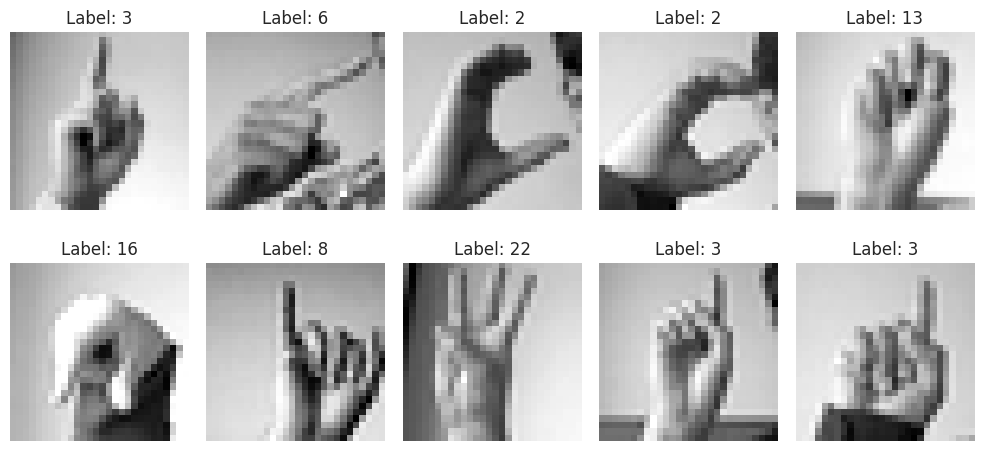

In [14]:
import matplotlib.pyplot as plt

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):  # Display 10 images
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')  # Reshape if images are flattened
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


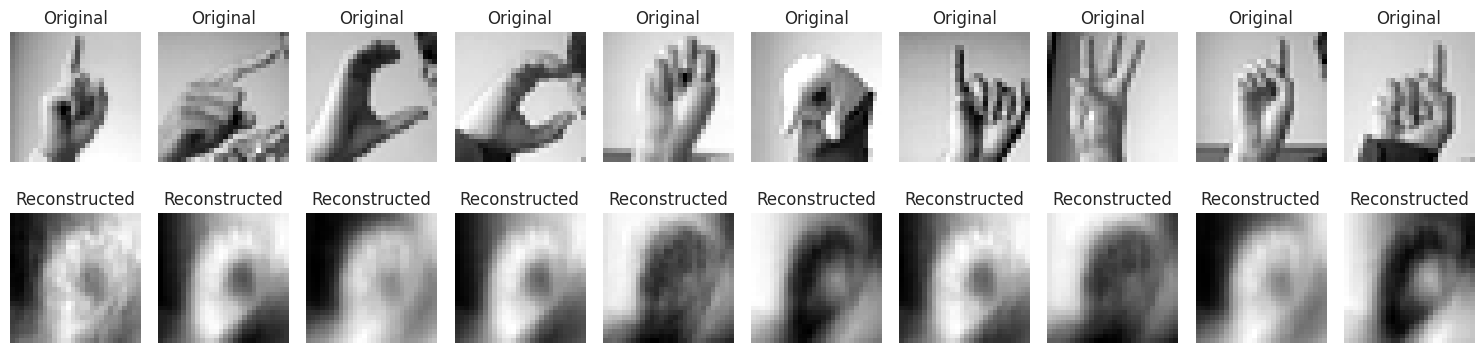

In [15]:
# Reconstruct images using PCA components
X_reconstructed = pca.inverse_transform(X_pca)

# Visualize original vs reconstructed
fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i in range(10):  # Display 10 images
    # Original
    axes[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    # Reconstructed
    axes[1, i].imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


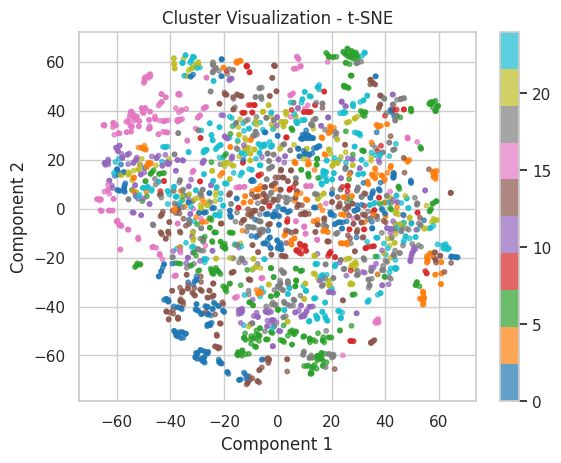

In [16]:
# Visualize clusters in reduced dimensions
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_small, cmap='tab10', alpha=0.7, s=10)
plt.colorbar()
plt.title("Cluster Visualization - t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
